In [0]:
# File location and type
file_location = "/FileStore/tables/WA_Fn_UseC_Telco_Customer_Churn.csv"
#Link to dataset: https://www.kaggle.com/blastchar/telco-customer-churn
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .option("nanValue", ' ') \
  .option("nullValue", ' ') \
  .load(file_location)

display(df)

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.1,1949.4,No
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.8,3046.05,Yes
6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [0]:
df.printSchema()

root
-- customerID: string (nullable = true)
-- gender: string (nullable = true)
-- SeniorCitizen: integer (nullable = true)
-- Partner: string (nullable = true)
-- Dependents: string (nullable = true)
-- tenure: integer (nullable = true)
-- PhoneService: string (nullable = true)
-- MultipleLines: string (nullable = true)
-- InternetService: string (nullable = true)
-- OnlineSecurity: string (nullable = true)
-- OnlineBackup: string (nullable = true)
-- DeviceProtection: string (nullable = true)
-- TechSupport: string (nullable = true)
-- StreamingTV: string (nullable = true)
-- StreamingMovies: string (nullable = true)
-- Contract: string (nullable = true)
-- PaperlessBilling: string (nullable = true)
-- PaymentMethod: string (nullable = true)
-- MonthlyCharges: double (nullable = true)
-- TotalCharges: double (nullable = true)
-- Churn: string (nullable = true)

In [0]:
from pyspark.sql.functions import isnan, when, count, col
df.select([count(when(isnan(c)|col(c).isNull(),c)).alias(c) for c in df.columns]).show()
#show() the count() of isnan() or isNull() for all the columns (df.columns) from the dataframe(df)

+----------+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+-------------+--------------+------------+-----+
customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|MultipleLines|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|Contract|PaperlessBilling|PaymentMethod|MonthlyCharges|TotalCharges|Churn|
+----------+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+-------------+--------------+------------+-----+
 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 11| 0|
+----------+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+-------------+--------------+------------+-----+

In [0]:
temp_table_name='churn_analysis'
df.createOrReplaceTempView(temp_table_name)

In [0]:
pd_df=df.toPandas()
#this is useful for manipulating & visualizing small datasets, which can be loaded into a small,local executor memory

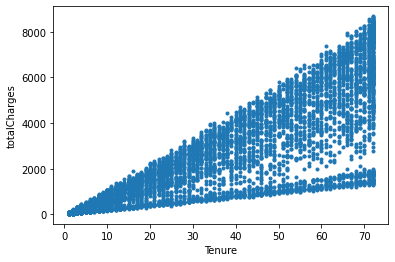

In [0]:
import matplotlib.pyplot as plt
plt.clf()
plt.plot(pd_df['tenure'],pd_df['TotalCharges'],'.')
plt.xlabel('Tenure')
plt.ylabel('totalCharges')
display()

In [0]:
%sql
select * from churn_analysis

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.1,1949.4,No
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.8,3046.05,Yes
6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [0]:
df.groupBy('Churn').count().show()

+-----+-----+
Churn|count|
+-----+-----+
 No| 5174|
 Yes| 1869|
+-----+-----+

In [0]:
df.select('tenure','TotalCharges','MonthlyCharges').describe().show()

+-------+------------------+------------------+------------------+
summary| tenure| TotalCharges| MonthlyCharges|
+-------+------------------+------------------+------------------+
 count| 7043| 7032| 7043|
 mean| 32.37114865824223|2283.3004408418697| 64.76169246059922|
 stddev|24.559481023094442| 2266.771361883145|30.090047097678482|
 min| 0| 18.8| 18.25|
 max| 72| 8684.8| 118.75|
+-------+------------------+------------------+------------------+

In [0]:
%sql
select gender, churn, count(*) from churn_analysis group by gender, churn

gender,churn,count(1)
Male,No,2625
Male,Yes,930
Female,No,2549
Female,Yes,939


In [0]:
%sql
select SeniorCitizen, churn, count(*) from churn_analysis group by SeniorCitizen, churn

SeniorCitizen,churn,count(1)
1,No,666
0,No,4508
0,Yes,1393
1,Yes,476


In [0]:
%sql
select cast(tenure as int),churn, count(2) from churn_analysis group by tenure, churn order by cast(tenure as int)

tenure,churn,count(2)
0,No,11
1,No,233
1,Yes,380
2,No,115
2,Yes,123
3,No,106
3,Yes,94
4,No,93
4,Yes,83
5,No,69


In [0]:
df.stat.crosstab('SeniorCitizen','InternetService').show()

+-----------------------------+----+-----------+----+
SeniorCitizen_InternetService| DSL|Fiber optic| No|
+-----------------------------+----+-----------+----+
 1| 259| 831| 52|
 0|2162| 2265|1474|
+-----------------------------+----+-----------+----+

In [0]:
df.stat.freqItems(["PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"],0.6).collect()
#returns a RDD which shows the most frequent item (more than 60% in this case-0.6) in each of the specified columns.

Out[10]: [Row(PhoneService_freqItems=['Yes'], MultipleLines_freqItems=['Yes'], InternetService_freqItems=['Fiber optic'], OnlineSecurity_freqItems=['No'], OnlineBackup_freqItems=['Yes'], DeviceProtection_freqItems=['No'], TechSupport_freqItems=['No'], StreamingTV_freqItems=['Yes'], StreamingMovies_freqItems=['No'])]

In [0]:
%sql
select PaperlessBilling, churn, count(*) from churn_analysis group by PaperlessBilling, churn

PaperlessBilling,churn,count(1)
Yes,Yes,1400
No,No,2403
Yes,No,2771
No,Yes,469


In [0]:
%sql
select PaymentMethod, churn, count(*) from churn_analysis group by PaymentMethod, churn

PaymentMethod,churn,count(1)
Credit card (automatic),No,1290
Bank transfer (automatic),No,1286
Mailed check,Yes,308
Credit card (automatic),Yes,232
Electronic check,No,1294
Electronic check,Yes,1071
Bank transfer (automatic),Yes,258
Mailed check,No,1304


In [0]:
churn_df=df
(train_data,test_data)=churn_df.randomSplit([0.7,0.3],24) #24 is the random number or seed
print('Records for training: '+str(train_data.count()))
print('Records for testing: '+str(test_data.count()))

Records for training: 4942
Records for testing: 2101

In [0]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler
#StringIndexer is used for converting string values to numerical values. It can sometimes work in tandem with OneHotEncoder. By definition it's "A label indexer that maps a string column of labels to an ML column of label indices". If the input column is numeric, we cast it to string and index the string values. The indices are in [0, numLabels). By default, this is ordered by label frequencies so the most frequent label gets index 0. The ordering behavior is controlled by setting stringOrderType. Its default value is ‘frequencyDesc’. When a dataframe has a string column with multiple labels (like a column describing 'Qualification' having distintc labels 'B.A','B.Com','B.Sc'), we can use StringIndexer to convert to a new column qualification_index with values 0.0, 1.0 & 2.0 denoting the 3 qualifications. “B.A.” gets index 0 because it is the most frequent, then “B.Com” gets index 1 and “B.Sc.” gets index 2.

#OneHotEncoder: A one-hot encoder that maps a column of category indices to a column of binary vectors, with at most a single one-value per row that indicates the input category index. For example with 5 categories, an input value of 2.0 would map to an output vector of [0.0, 0.0, 1.0, 0.0]. The last category is not included by default (configurable via dropLast), because it makes the vector entries sum up to one, and hence linearly dependent. So an input value of 4.0 maps to [0.0, 0.0, 0.0, 0.0]. When handleInvalid is configured to ‘keep’, an extra “category” indicating invalid values is added as last category. So when dropLast is true, invalid values are encoded as all-zeros vector.

#VectorAssembler is to convert all the engineered data into a vector before passing into the modeller.

catColumns=["gender","SeniorCitizen","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod"]

In [0]:
stages = []

for catCol in catColumns:
  stringIndexer=StringIndexer(inputCol=catCol,outputCol=catCol+"Index")
  encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()],outputCols=[catCol+"catVec"])
#OneHotEncoder takes the indexed column (say genderIndex) creates 2 new columns out of it as there are 2 levels in the genderIndex column. So in the first step, 'gender' with values Male-Female, will get converted to genderIndex with values 0-1 (Male is assigned 0 as it is more frequent) by StringIndexer, and then OneHotEncoder will convert this genderIndex to a new column gendercatVec which will have values of [1.0,0.0] for Male (0.0) and [0.0,0.0] for Female (1.0).
  stages += [stringIndexer,encoder]

In [0]:
stages

Out[14]: [StringIndexer_36bb13ff7462,
 OneHotEncoder_c2884aa47a61,
 StringIndexer_892f5c425c7a,
 OneHotEncoder_403c92cc6e61,
 StringIndexer_ba9987b9b78b,
 OneHotEncoder_82d2b335c42d,
 StringIndexer_f009af746381,
 OneHotEncoder_f3a28a930f04,
 StringIndexer_ece972f7abbe,
 OneHotEncoder_bcd6ac3bfd75,
 StringIndexer_3c67e48a1132,
 OneHotEncoder_5b9f6863bc77,
 StringIndexer_2d1167a2a948,
 OneHotEncoder_58846b693bca,
 StringIndexer_ff3cff9a73fc,
 OneHotEncoder_f4a8ce10b071,
 StringIndexer_00cd96003eb7,
 OneHotEncoder_0bd3b1385318,
 StringIndexer_c4891612cec4,
 OneHotEncoder_8864f065b668,
 StringIndexer_4535f07bd4f6,
 OneHotEncoder_d57845af2ddc,
 StringIndexer_2fd49ca10071,
 OneHotEncoder_0227ae78e36a,
 StringIndexer_bff4e684d54c,
 OneHotEncoder_bc8d464e74ca,
 StringIndexer_c81378b92391,
 OneHotEncoder_6c6143cfb3a5,
 StringIndexer_1778cc9548f2,
 OneHotEncoder_ea76b56d486e,
 StringIndexer_a665c4ddcc64,
 OneHotEncoder_7b98b428b8b5]

In [0]:
from pyspark.ml.feature import Imputer
imputer = Imputer(inputCols=["TotalCharges"],outputCols=["Out_TotalCharges"])
stages += [imputer]

In [0]:
label_Idx = StringIndexer(inputCol='Churn',outputCol='label')
#We don't want to One-Hot encode the binary value target column (Churn), so we simply use StrinIndexer to index it & add it to the pipeline. It is important to assign the target column a name of 'label' for the model to understand that this column represents the target
stages += [label_Idx]

In [0]:
temp = label_Idx.fit(train_data).transform(train_data)

In [0]:
temp.show(1)
#StringIndexer works by assigning the most frequently occuring value 0 & then proceeds to index other categorical values in their descending order of frequency.

+----------+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+-------------+--------------+------------+-----+-----+
customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|MultipleLines|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|Contract|PaperlessBilling|PaymentMethod|MonthlyCharges|TotalCharges|Churn|label|
+----------+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+-------------+--------------+------------+-----+-----+
0002-ORFBO|Female| 0| Yes| Yes| 9| Yes| No| DSL| No| Yes| No| Yes| Yes| No|One year| Yes| Mailed check| 65.6| 593.3| No| 0.0|
+----------+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+-------------+--------------+------------+-----+-----+
only showing top 1 row

In [0]:
df.stat.corr('TotalCharges','MonthlyCharges')

Out[19]: 0.6511738315787813

In [0]:
%sql
select cast(tenure as int), churn, count(*) as churned from churn_analysis where churn='Yes' group by tenure, churn order by cast(tenure as int)

tenure,churn,churned
1,Yes,380
2,Yes,123
3,Yes,94
4,Yes,83
5,Yes,64
6,Yes,40
7,Yes,51
8,Yes,42
9,Yes,46
10,Yes,45


In [0]:
from pyspark.ml.feature import QuantileDiscretizer
tenure_bin = QuantileDiscretizer(numBuckets=3, inputCol='tenure', outputCol='tenure_bin')
#quantizing the 'tenure' column into 3 buckets, keeping around 24 tenures per bucket
stages += [tenure_bin]

In [0]:
stages

Out[21]: [StringIndexer_36bb13ff7462,
 OneHotEncoder_c2884aa47a61,
 StringIndexer_892f5c425c7a,
 OneHotEncoder_403c92cc6e61,
 StringIndexer_ba9987b9b78b,
 OneHotEncoder_82d2b335c42d,
 StringIndexer_f009af746381,
 OneHotEncoder_f3a28a930f04,
 StringIndexer_ece972f7abbe,
 OneHotEncoder_bcd6ac3bfd75,
 StringIndexer_3c67e48a1132,
 OneHotEncoder_5b9f6863bc77,
 StringIndexer_2d1167a2a948,
 OneHotEncoder_58846b693bca,
 StringIndexer_ff3cff9a73fc,
 OneHotEncoder_f4a8ce10b071,
 StringIndexer_00cd96003eb7,
 OneHotEncoder_0bd3b1385318,
 StringIndexer_c4891612cec4,
 OneHotEncoder_8864f065b668,
 StringIndexer_4535f07bd4f6,
 OneHotEncoder_d57845af2ddc,
 StringIndexer_2fd49ca10071,
 OneHotEncoder_0227ae78e36a,
 StringIndexer_bff4e684d54c,
 OneHotEncoder_bc8d464e74ca,
 StringIndexer_c81378b92391,
 OneHotEncoder_6c6143cfb3a5,
 StringIndexer_1778cc9548f2,
 OneHotEncoder_ea76b56d486e,
 StringIndexer_a665c4ddcc64,
 OneHotEncoder_7b98b428b8b5,
 Imputer_bb9b57b9c7bc,
 StringIndexer_7c515c9a41e1,
 QuantileDiscretizer_3b0ca6d97c73]

In [0]:
numericCols=["tenure_bin","Out_TotalCharges","MonthlyCharges"]
assembleInputs=assemblerInputs=[c+"catVec" for c in catColumns] + numericCols
#assembleInputs is a combination of all categorical columns (catColumns) and numerical columns (numericCols). All categorical columns are appended with 'catVec' at the end to distinguish as categorical columns
assembler = VectorAssembler(inputCols=assembleInputs, outputCol="features")
#the model features are named as 'feature' to help the modeller distinguish between features & labels, i.e. input & target.
stages += [assembler]

In [0]:
pipeline = Pipeline().setStages(stages)
pipelineModel = pipeline.fit(train_data)

In [0]:
trainprepDF = pipelineModel.transform(train_data)
testprepDF = pipelineModel.transform(test_data)

In [0]:
trainprepDF.head(2)

Out[39]: [Row(customerID='0002-ORFBO', gender='Female', SeniorCitizen=0, Partner='Yes', Dependents='Yes', tenure=9, PhoneService='Yes', MultipleLines='No', InternetService='DSL', OnlineSecurity='No', OnlineBackup='Yes', DeviceProtection='No', TechSupport='Yes', StreamingTV='Yes', StreamingMovies='No', Contract='One year', PaperlessBilling='Yes', PaymentMethod='Mailed check', MonthlyCharges=65.6, TotalCharges=593.3, Churn='No', genderIndex=1.0, gendercatVec=SparseVector(1, {}), SeniorCitizenIndex=0.0, SeniorCitizencatVec=SparseVector(1, {0: 1.0}), PartnerIndex=1.0, PartnercatVec=SparseVector(1, {}), DependentsIndex=1.0, DependentscatVec=SparseVector(1, {}), PhoneServiceIndex=0.0, PhoneServicecatVec=SparseVector(1, {0: 1.0}), MultipleLinesIndex=0.0, MultipleLinescatVec=SparseVector(2, {0: 1.0}), InternetServiceIndex=1.0, InternetServicecatVec=SparseVector(2, {1: 1.0}), OnlineSecurityIndex=0.0, OnlineSecuritycatVec=SparseVector(2, {0: 1.0}), OnlineBackupIndex=1.0, OnlineBackupcatVec=SparseVector(2, {1: 1.0}), DeviceProtectionIndex=0.0, DeviceProtectioncatVec=SparseVector(2, {0: 1.0}), TechSupportIndex=1.0, TechSupportcatVec=SparseVector(2, {1: 1.0}), StreamingTVIndex=1.0, StreamingTVcatVec=SparseVector(2, {1: 1.0}), StreamingMoviesIndex=0.0, StreamingMoviescatVec=SparseVector(2, {0: 1.0}), ContractIndex=2.0, ContractcatVec=SparseVector(2, {}), PaperlessBillingIndex=0.0, PaperlessBillingcatVec=SparseVector(1, {0: 1.0}), PaymentMethodIndex=1.0, PaymentMethodcatVec=SparseVector(3, {1: 1.0}), Out_TotalCharges=593.3, label=0.0, tenure_bin=0.0, features=SparseVector(30, {1: 1.0, 4: 1.0, 5: 1.0, 8: 1.0, 9: 1.0, 12: 1.0, 13: 1.0, 16: 1.0, 18: 1.0, 19: 1.0, 23: 1.0, 25: 1.0, 28: 593.3, 29: 65.6})),
 Row(customerID='0003-MKNFE', gender='Male', SeniorCitizen=0, Partner='No', Dependents='No', tenure=9, PhoneService='Yes', MultipleLines='Yes', InternetService='DSL', OnlineSecurity='No', OnlineBackup='No', DeviceProtection='No', TechSupport='No', StreamingTV='No', StreamingMovies='Yes', Contract='Month-to-month', PaperlessBilling='No', PaymentMethod='Mailed check', MonthlyCharges=59.9, TotalCharges=542.4, Churn='No', genderIndex=0.0, gendercatVec=SparseVector(1, {0: 1.0}), SeniorCitizenIndex=0.0, SeniorCitizencatVec=SparseVector(1, {0: 1.0}), PartnerIndex=0.0, PartnercatVec=SparseVector(1, {0: 1.0}), DependentsIndex=0.0, DependentscatVec=SparseVector(1, {0: 1.0}), PhoneServiceIndex=0.0, PhoneServicecatVec=SparseVector(1, {0: 1.0}), MultipleLinesIndex=1.0, MultipleLinescatVec=SparseVector(2, {1: 1.0}), InternetServiceIndex=1.0, InternetServicecatVec=SparseVector(2, {1: 1.0}), OnlineSecurityIndex=0.0, OnlineSecuritycatVec=SparseVector(2, {0: 1.0}), OnlineBackupIndex=0.0, OnlineBackupcatVec=SparseVector(2, {0: 1.0}), DeviceProtectionIndex=0.0, DeviceProtectioncatVec=SparseVector(2, {0: 1.0}), TechSupportIndex=0.0, TechSupportcatVec=SparseVector(2, {0: 1.0}), StreamingTVIndex=0.0, StreamingTVcatVec=SparseVector(2, {0: 1.0}), StreamingMoviesIndex=1.0, StreamingMoviescatVec=SparseVector(2, {1: 1.0}), ContractIndex=0.0, ContractcatVec=SparseVector(2, {0: 1.0}), PaperlessBillingIndex=1.0, PaperlessBillingcatVec=SparseVector(1, {}), PaymentMethodIndex=1.0, PaymentMethodcatVec=SparseVector(3, {1: 1.0}), Out_TotalCharges=542.4, label=0.0, tenure_bin=0.0, features=SparseVector(30, {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 9: 1.0, 11: 1.0, 13: 1.0, 15: 1.0, 17: 1.0, 20: 1.0, 21: 1.0, 25: 1.0, 28: 542.4, 29: 59.9}))]

In [0]:
#If we see above, the 'gender' column has value 'Female' and since 'Male' is the more frequently accoring value (hence it will be assigned value 0.0, we have 1.0 in genderIndex. Similarly, gendercatVec has been created as a sparse vector with values (1,{}). If the 'gender' column had value 'Male', then genderIndex & gendercatVec would have values 0.0, (1,{0:1.0}). Like I had mentioned earlier, OneHotEncoder creates sparse vectors where the values are represented in binary format and the last value is implicitly understood. Thus in this case as 'Male' is more frequent than 'Female', we have them indexed as 0.0 & 1.0 and OneHotEncoding causes them to be {} & {0:1.0}. Also the value 1 signifies only 2 values being available for the column. Sparse Vectors are very space efficient & help speed up model execution.

#The last line is the feature sparse vector which shows that there are 30 features and if we compare the 2 vectors we see that wherever the value is 0, the VectorAssembler has skipped that the value of such column is implicitly understood to be 0

In [0]:
trainprepDF.select("tenure_bin").show()

+----------+
tenure_bin|
+----------+
 0.0|
 0.0|
 0.0|
 0.0|
 0.0|
 0.0|
 2.0|
 0.0|
 2.0|
 2.0|
 0.0|
 2.0|
 1.0|
 0.0|
 1.0|
 0.0|
 0.0|
 0.0|
 2.0|
 2.0|
+----------+
only showing top 20 rows

In [0]:
from pyspark.ml.classification import LogisticRegression

#Create initial Logistic Regression model
lr = LogisticRegression(labelCol='label',featuresCol='features',maxIter=10)

#Train model with training data
lrmodel = lr.fit(trainprepDF)

In [0]:
print ("Coefficients: " + str(lrmodel.coefficients))
print ("Intercept: " + str(lrmodel.intercept))

Coefficients: [0.03428096117462176,-0.33121628449628626,-0.10403353480848117,0.12868949953120093,-0.6191319066991556,-0.24717797826289087,0.026856518488302523,0.5947672912779566,-0.43247345849078145,0.2603430987936118,-0.07873494378528201,0.1759922587819037,0.025094376876394306,0.13427108880327884,0.07038245227252769,0.24746208612235363,-0.06197277109519486,-0.037427814879673386,0.24498552330495743,0.012591165389667957,0.1928780997457297,0.7074105789470353,-0.8525993844823548,0.2978156771216542,0.33700459962330087,-0.08658398567782494,0.0100020300984617,-0.7221850241280543,-0.00011665000139783263,0.00517932123476872]
Intercept: -1.1540815271668818

In [0]:
summary = lrmodel.summary

In [0]:
accuracy = summary.accuracy
falsePositiveRate = summary.weightedFalsePositiveRate
truePositiveRate = summary.weightedTruePositiveRate
fmeasure = summary.weightedFMeasure()
precision = summary.weightedPrecision
recall = summary.weightedRecall
print ("Accuracy: %s\nFPR: %s\nTPR: %s\nF-measure: %s\nPrecision: %s\nRecall: %s\nAUC: %s" % (accuracy, falsePositiveRate, truePositiveRate, fmeasure, precision, recall, summary.areaUnderROC))

Accuracy: 0.8057466612707406
FPR: 0.3625173099768732
TPR: 0.8057466612707406
F-measure: 0.7993759299320431
Precision: 0.7971094940545889
Recall: 0.8057466612707406
AUC: 0.8499058928782474

In [0]:
display(lrmodel, trainprepDF, "ROC")

False Positive Rate,True Positive Rate,Threshold
0.0,0.0,0.8458637000472722
0.0,0.029411764705882353,0.8458637000472722
0.0,0.058823529411764705,0.8347118418632031
0.0,0.08823529411764706,0.8033949423999586
0.013333333333333334,0.08823529411764706,0.7709801787007405
0.013333333333333334,0.11764705882352941,0.7619157521449273
0.013333333333333334,0.14705882352941177,0.7578443994039794
0.02666666666666667,0.14705882352941177,0.7340875942189183
0.04,0.14705882352941177,0.7319225722530838
0.04,0.17647058823529413,0.7219260129462788


In [0]:
display(lrmodel, trainprepDF, "fittedVsResiduals")

fitted values,residuals
-0.6097939406265847,-0.3521062042809622
1.4076494939471005,0.19660505760004143
-0.8499458910534703,0.7005557917644181
-0.3952881224785637,0.5975550563353178
-0.07387731279196952,-0.481539067466351
0.011411771934695003,0.49714708797713936
-1.9989649405780163,-0.11931163946294987
-4.4673740095016745,-0.011347179597581247
-1.032071892916716,0.737317378274447
-4.5082598275098,-0.01089755102295098


In [0]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
predictions = lrmodel.transform(testprepDF)
evaluatorLR = BinaryClassificationEvaluator(rawPredictionCol="prediction") #the predictions DF will have a column 'prediction' which is to be understood as the predicted values on test data
area_under_curve=evaluatorLR.evaluate(predictions) #by default it returns an AUC, but this can be changed

#default evaluation is areaUnderROC
print ("areaUnderROC = %g" % area_under_curve)

evaluatorLR.getMetricName()

areaUnderROC = 0.704116
Out[48]: 'areaUnderROC'

In [0]:
from pyspark.mllib.evaluation import BinaryClassificationMetrics

results = predictions.select(['prediction','label'])

#prepare score-label set
results_collect = results.collect()
results_list=[(float(i[0]),float(i[1])) for i in results_collect]
predictionAndlabels = sc.parallelize(results_list)

metrics = BinaryClassificationMetrics(predictionAndlabels)

#Area under precision-recall curve
print("Area under PR=%s"%metrics.areaUnderPR)

#Area under ROC curve
print("Area under ROC=%s"%metrics.areaUnderROC)

predictions.show(1)

Area under PR=0.5395619163792253
Area under ROC=0.7041164527040232
+----------+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+--------------------+--------------+------------+-----+-----------+-------------+------------------+-------------------+------------+-------------+---------------+----------------+-----------------+------------------+------------------+-------------------+--------------------+---------------------+-------------------+--------------------+-----------------+------------------+---------------------+----------------------+----------------+-----------------+----------------+-----------------+--------------------+---------------------+-------------+--------------+---------------------+----------------------+------------------+-------------------+----------------+-----+----------+--------------------+--------------------+--------------------+----------+
customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|MultipleLines|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|Contract|PaperlessBilling| PaymentMethod|MonthlyCharges|TotalCharges|Churn|genderIndex| gendercatVec|SeniorCitizenIndex|SeniorCitizencatVec|PartnerIndex|PartnercatVec|DependentsIndex|DependentscatVec|PhoneServiceIndex|PhoneServicecatVec|MultipleLinesIndex|MultipleLinescatVec|InternetServiceIndex|InternetServicecatVec|OnlineSecurityIndex|OnlineSecuritycatVec|OnlineBackupIndex|OnlineBackupcatVec|DeviceProtectionIndex|DeviceProtectioncatVec|TechSupportIndex|TechSupportcatVec|StreamingTVIndex|StreamingTVcatVec|StreamingMoviesIndex|StreamingMoviescatVec|ContractIndex|ContractcatVec|PaperlessBillingIndex|PaperlessBillingcatVec|PaymentMethodIndex|PaymentMethodcatVec|Out_TotalCharges|label|tenure_bin| features| rawPrediction| probability|prediction|
+----------+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+--------------------+--------------+------------+-----+-----------+-------------+------------------+-------------------+------------+-------------+---------------+----------------+-----------------+------------------+------------------+-------------------+--------------------+---------------------+-------------------+--------------------+-----------------+------------------+---------------------+----------------------+----------------+-----------------+----------------+-----------------+--------------------+---------------------+-------------+--------------+---------------------+----------------------+------------------+-------------------+----------------+-----+----------+--------------------+--------------------+--------------------+----------+
0014-BMAQU| Male| 0| Yes| No| 63| Yes| Yes| Fiber optic| Yes| No| No| Yes| No| No|Two year| Yes|Credit card (auto...| 84.65| 5377.8| No| 0.0|(1,[0],[1.0])| 0.0| (1,[0],[1.0])| 1.0| (1,[],[])| 0.0| (1,[0],[1.0])| 0.0| (1,[0],[1.0])| 1.0| (2,[1],[1.0])| 0.0| (2,[0],[1.0])| 1.0| (2,[1],[1.0])| 0.0| (2,[0],[1.0])| 0.0| (2,[0],[1.0])| 1.0| (2,[1],[1.0])| 0.0| (2,[0],[1.0])| 0.0| (2,[0],[1.0])| 1.0| (2,[1],[1.0])| 0.0| (1,[0],[1.0])| 3.0| (3,[],[])| 5377.8| 0.0| 2.0|(30,[0,1,3,4,6,7,...|[3.36316105528644...|[0.96653317765235...| 0.0|
+----------+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+--------------------+--------------+------------+-----+-----------+-------------+------------------+-------------------+------------+-------------+---------------+----------------+-----------------+------------------+------------------+-------------------+--------------------+---------------------+---------

In [0]:
test_data.groupBy('Churn').count().show()

+-----+-----+
Churn|count|
+-----+-----+
 No| 1534|
 Yes| 567|
+-----+-----+

In [0]:
count = predictions.count()
correct = results.filter(results.prediction == results.label).count()
wrong = results.filter(results.prediction != results.label).count()

tp = results.filter(results.prediction == 1.0).filter(results.prediction == results.label).count()
fp = results.filter(results.prediction == 1.0).filter(results.prediction != results.label).count()
fn = results.filter(results.prediction == 0.0).filter(results.prediction != results.label).count()
tn = results.filter(results.prediction == 0.0).filter(results.prediction == results.label).count()

accuracy = (tp+tn)/count
precision = tp/(tp+fp)
recall = tp/(tp+fn)

print ("Correct: %s\nWrong: %s\ntp: %s\ntn: %s\nfn: %s\nfp: %s\nAccuracy: %s\nPrecision: %s\nRecall: %s" %(correct, wrong, tp, tn, fn, fp, accuracy, precision, recall))

Correct: 1652
Wrong: 449
tp: 298
tn: 1354
fn: 269
fp: 180
Accuracy: 0.786292241789624
Precision: 0.6234309623430963
Recall: 0.5255731922398589

In [0]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

#create ParamGrid for Cross-Validation
paramGrid = (ParamGridBuilder().
             addGrid(lr.regParam,[0.01,0.5,2.0]).
             addGrid(lr.elasticNetParam,[0.0,0.5,1.0]).
             addGrid(lr.maxIter,[5,10,20]).build())

In [0]:
cv = CrossValidator(estimator=lr, estimatorParamMaps=paramGrid, evaluator=evaluatorLR, numFolds=5)

#Run cross validations
cvModel = cv.fit(trainprepDF)

/databricks/spark/python/pyspark/ml/util.py:838: UserWarning: Cannot find mlflow module. To enable MLflow logging, install mlflow from PyPI.
 warnings.warn(_MLflowInstrumentation._NO_MLFLOW_WARNING)

In [0]:
predictions = cvModel.bestModel.transform(testprepDF)

In [0]:
evaluatorLR.evaluate(predictions)

Out[76]: 0.7058421804184516

In [0]:
results = predictions.select(['prediction','label'])

count = predictions.count()
correct = results.filter(results.prediction == results.label).count()
wrong = results.filter(results.prediction != results.label).count()

tp = results.filter(results.prediction == 1.0).filter(results.prediction == results.label).count()
fp = results.filter(results.prediction == 1.0).filter(results.prediction != results.label).count()
fn = results.filter(results.prediction == 0.0).filter(results.prediction != results.label).count()
tn = results.filter(results.prediction == 0.0).filter(results.prediction == results.label).count()

accuracy = (tp+tn)/count
precision = tp/(tp+fp)
recall = tp/(tp+fn)

print ("Correct: %s\nWrong: %s\ntp: %s\ntn: %s\nfn: %s\nfp: %s\nAccuracy: %s\nPrecision: %s\nRecall: %s" %(correct, wrong, tp, tn, fn, fp, accuracy, precision, recall))

Correct: 1659
Wrong: 442
tp: 297
tn: 1362
fn: 270
fp: 172
Accuracy: 0.7896239885768681
Precision: 0.6332622601279317
Recall: 0.5238095238095238

In [0]:
cvModel.explainParams()

Out[78]: "estimator: estimator to be cross-validated (current: LogisticRegression_13a4e598ea7a)\nestimatorParamMaps: estimator param maps (current: [{Param(parent='LogisticRegression_13a4e598ea7a', name='regParam', doc='regularization parameter (>= 0).'): 0.01, Param(parent='LogisticRegression_13a4e598ea7a', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 0.0, Param(parent='LogisticRegression_13a4e598ea7a', name='maxIter', doc='max number of iterations (>= 0).'): 5}, {Param(parent='LogisticRegression_13a4e598ea7a', name='regParam', doc='regularization parameter (>= 0).'): 0.01, Param(parent='LogisticRegression_13a4e598ea7a', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 0.0, Param(parent='LogisticRegression_13a4e598ea7a', name='maxIter', doc='max number of iterations (>= 0).'): 10}, {Param(parent='LogisticRegression_13a4e598ea7a', name='regParam', doc='regularization parameter (>= 0).'): 0.01, Param(parent='LogisticRegression_13a4e598ea7a', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 0.0, Param(parent='LogisticRegression_13a4e598ea7a', name='maxIter', doc='max number of iterations (>= 0).'): 20}, {Param(parent='LogisticRegression_13a4e598ea7a', name='regParam', doc='regularization parameter (>= 0).'): 0.01, Param(parent='LogisticRegression_13a4e598ea7a', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 0.5, Param(parent='LogisticRegression_13a4e598ea7a', name='maxIter', doc='max number of iterations (>= 0).'): 5}, {Param(parent='LogisticRegression_13a4e598ea7a', name='regParam', doc='regularization parameter (>= 0).'): 0.01, Param(parent='LogisticRegression_13a4e598ea7a', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 0.5, Param(parent='LogisticRegression_13a4e598ea7a', name='maxIter', doc='max number of iterations (>= 0).'): 10}, {Param(parent='LogisticRegression_13a4e598ea7a', name='regParam', doc='regularization parameter (>= 0).'): 0.01, Param(parent='LogisticRegression_13a4e598ea7a', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 0.5, Param(parent='LogisticRegression_13a4e598ea7a', name='maxIter', doc='max number of iterations (>= 0).'): 20}, {Param(parent='LogisticRegression_13a4e598ea7a', name='regParam', doc='regularization parameter (>= 0).'): 0.01, Param(parent='LogisticRegression_13a4e598ea7a', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 1.0, Param(parent='LogisticRegression_13a4e598ea7a', name='maxIter', doc='max number of iterations (>= 0).'): 5}, {Param(parent='LogisticRegression_13a4e598ea7a', name='regParam', doc='regularization parameter (>= 0).'): 0.01, Param(parent='LogisticRegression_13a4e598ea7a', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 1.0, Param(parent='LogisticRegression_13a4e598ea7a', name='maxIter', doc='max number of iterations (>= 0).'): 10}, {Param(parent='LogisticRegression_13a4e598ea7a', name='regParam', doc='regularization parameter (>= 0).'): 0.01, Param(parent='LogisticRegression_13a4e598ea7a', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 1.0, Param(parent=

In [0]:
from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(labelCol='label',featuresCol='features').setImpurity('gini').setMaxDepth(6).setNumTrees(50).setFeatureSubsetStrategy('auto').setSeed(1010)

rfModel = rf.fit(trainprepDF)

In [0]:
predictions=rfModel.transform(testprepDF)

In [0]:
results = predictions.select(['prediction','label'])

count = predictions.count()
correct = results.filter(results.prediction == results.label).count()
wrong = results.filter(results.prediction != results.label).count()

tp = results.filter(results.prediction == 1.0).filter(results.prediction == results.label).count()
fp = results.filter(results.prediction == 1.0).filter(results.prediction != results.label).count()
fn = results.filter(results.prediction == 0.0).filter(results.prediction != results.label).count()
tn = results.filter(results.prediction == 0.0).filter(results.prediction == results.label).count()

accuracy = (tp+tn)/count
precision = tp/(tp+fp)
recall = tp/(tp+fn)

print ("Correct: %s\nWrong: %s\ntp: %s\ntn: %s\nfn: %s\nfp: %s\nAccuracy: %s\nPrecision: %s\nRecall: %s" %(correct, wrong, tp, tn, fn, fp, accuracy, precision, recall))

Correct: 1647
Wrong: 454
tp: 233
tn: 1414
fn: 334
fp: 120
Accuracy: 0.7839124226558781
Precision: 0.660056657223796
Recall: 0.4109347442680776